# DATASET INFORMATION

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

In [1]:
#Importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Importing Dataset
# Reading the excel file
#Importing trianiing and testing dataset

df_train=pd.read_csv("Maligant Test.csv")
df_test = pd.read_csv("Maligant Test2.csv")
df_train.head()


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
#Printing the rows & columns of the dataset

print("The no. of Rows in dataset is: ",df_train.shape[0],"and no. of columns is ",df_train.shape[1])

The no. of Rows in dataset is:  159571 and no. of columns is  8


In [4]:
#Printing the information about the dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
#Printing the description of the train dataset

df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Droping unnecessary column

df_train.drop("id",axis=1,inplace=True)

<AxesSubplot:xlabel='malignant', ylabel='count'>

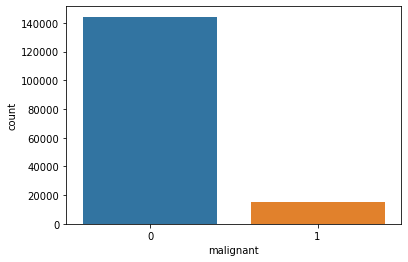

In [7]:
#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["malignant"])

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

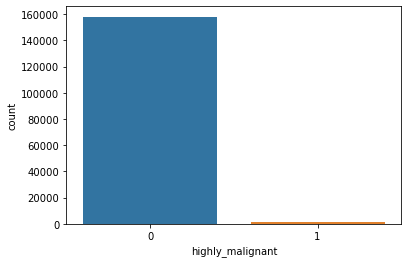

In [8]:
#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["highly_malignant"])

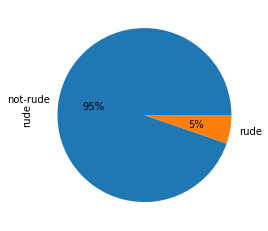

In [9]:
#We see very low prpobabliy of comment being malignant

df_train["rude"].value_counts().plot.pie(labels=["not-rude", "rude"], autopct="%1.0f%%")
plt.show()

<AxesSubplot:xlabel='threat', ylabel='count'>

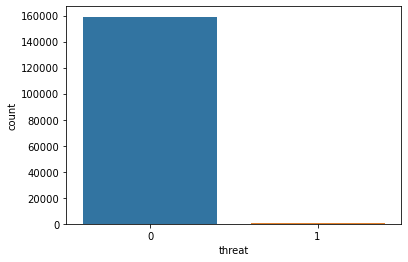

In [10]:
#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["threat"])

<AxesSubplot:xlabel='abuse', ylabel='count'>

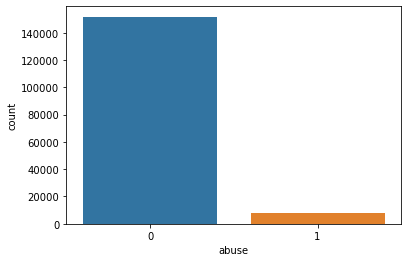

In [11]:
#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["abuse"])

<AxesSubplot:xlabel='loathe', ylabel='count'>

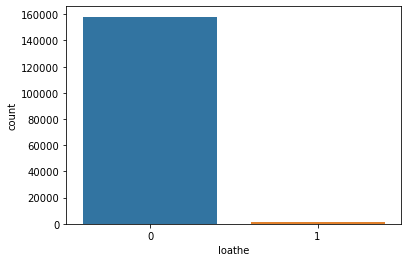

In [12]:
#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["loathe"])

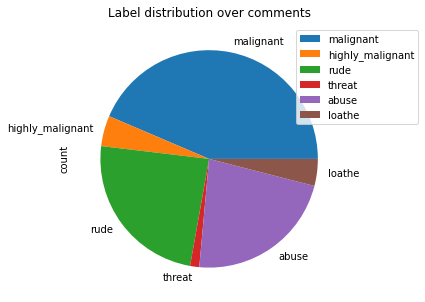

In [13]:
#Checking how which comment fall under which category

cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = df_train[cols_target].sum().to_frame().rename(columns={0: 'count'})
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

<AxesSubplot:>

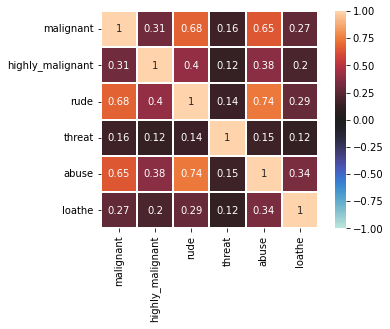

In [14]:
#Printing the correlation through the heatmap of the train dataset

sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)

In [5]:
#Checking length of document

df_train["original_len"] = df_train["comment_text"].str.len() 

In [6]:
#Converting all letter to lower case

df_train["comment_text"] = df_train["comment_text"].str.lower()

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
#Replacing with email address
df_train["comment_text"]= df_train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#Replacing with web address                                                 
df_train["comment_text"]= df_train["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    
#Replacing with number
df_train["comment_text"]= df_train["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#Remove  punctation
df_train["comment_text"]=df_train["comment_text"].str.replace(r'[^\w\d\s]'," ")

#Replace extra space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+'," ")

#Replacing leadning and trailing white space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+|\s+?$', "")

#Removing \n
df_train["comment_text"]=df_train["comment_text"].str.replace("\n"," ")


#Remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df_train["comment_text"]= df_train["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#Such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(word) for word in x.split()))

In [9]:
#Checking clean length

df_train["clean_len"] = df_train["comment_text"].str.len() 

In [19]:
#Printing the first five rows of the datset

df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_len,clean_len
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,170
1,match background colour seemingly stuck thanks...,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,67,29


In [10]:
#Making one target column 

df_train["label"]=df_train["malignant"] | df_train["highly_malignant"] | df_train["rude"] | df_train["threat"] | df_train["abuse"] | df_train["loathe"]

In [11]:
#Printing the original length & cleaned length

print('original length',df_train.original_len.sum())
print('cleaned length',df_train.clean_len.sum())

original length 62893130
cleaned length 40149092


In [24]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - wordcloud


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/win-64::wordcloud-1.8.2.2-py39hb82d6ee_0

The following packages will be UPDATED:


Note: you may need to restart the kernel to use updated packages.  conda              pkgs/main::conda-4.10.3-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1


Preparing transaction: ...working... done
Verifying transaction: ...working... failed





==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [29]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - conda


The following packages will be UPDATED:

  conda                               4.10.3-py39haa95532_0 --> 4.13.0-py39haa95532_0
  conda-package-han~                   1.7.3-py39h8cc25b3_1 --> 1.8.1-py39h8cc25b3_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [22]:
#Printing the first five rows of the test dataset

df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [12]:
#Printing the rows & the columns of the test dataset

print("The no. of Rows in dataset is: ",df_test.shape[0],"and no. of columns is ",df_test.shape[1])

The no. of Rows in dataset is:  153164 and no. of columns is  2


In [13]:
#Dropping the column id as it do not contribute towards the analysis part

df_test.drop("id",axis=1,inplace=True)

In [14]:
#Converting the text to the lower

df_test["comment_text"] = df_test["comment_text"].str.lower()

In [15]:
#Storing the length to the new column to original len

df_test["original_len"] = df_test["comment_text"].str.len() 

In [27]:
#Printing the first five rows of test dataset

df_test.head()

,comment_text,original_len
0,yo bitch ja rule is more succesful then you'll...,367
1,== from rfc == \n\n the title is fine as it is...,50
2,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,":if you have a look back at the source, the in...",205
4,i don't anonymously edit articles at all.,41


In [16]:
#Replacing with email address
df_test["comment_text"]= df_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#Replacing with web address                                                   
df_test["comment_text"]= df_test["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    
#Replacing with number
df_test["comment_text"]= df_test["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#Remove  punctation
df_test["comment_text"]=df_test["comment_text"].str.replace(r'[^\w\d\s]'," ")

#Replace extra space
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^\s+'," ")

#Replacing leading and trailing white space
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^\s+|\s+?$', "")

#Replacing with\n
df_test["comment_text"]=df_test["comment_text"].str.replace("\n"," ")

#Remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df_test["comment_text"]= df_test["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(word) for word in x.split()))

In [17]:
#Storing the length to the clean length new column

df_test["clean_len"] = df_test["comment_text"].str.len() 

In [30]:
#Printing the first five rows of the test dataset

df_test.head()

,comment_text,original_len,clean_len
0,yo bitch rule succesful ever whats hating sad ...,367,221
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


In [31]:
#Printing the original length & the cleaned length of the test dataset

print('original length',df_test.original_len.sum())
print('cleaned length',df_test.clean_len.sum())

original length 55886104
cleaned length 35617170


In [18]:
#Importing all the classifiers which will help us for further analysis

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [19]:
#Using tfidf vectorizer to convert text into vector as our machine learning model only understands numerical value

tf= TfidfVectorizer()
features = tf.fit_transform(df_train["comment_text"])
x= features
y= df_train["label"]

In [20]:
#Sending the data for training & testing

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=70)

# Logistic Regression

In [21]:
#Fitting & predicting the model

lr= LogisticRegression()
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)

In [22]:
#Printing the classification report

print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [23]:
#Printing the accuracy score , cross validation & logloss

a=accuracy_score(y_test,y_pred)
c=cross_val_score(lr,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9561326548517284 
 cross validation score : 0.9541646025444619 
 logloss: 1.5151277924313036


In [24]:
#Printing the confusion matrix

confusion_matrix(y_test,y_pred)

array([[35689,   168],
       [ 1582,  2454]], dtype=int64)

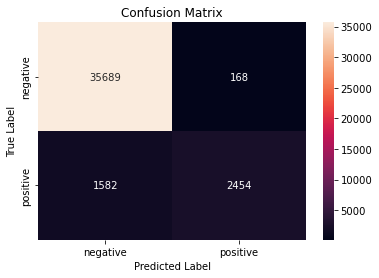

In [25]:
#Printing the graph of confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
#Creating empty lists & appending 

accuracy = []
cross_val = []
diff = []
logloss=[]
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# ADA Boost Classifier

In [ ]:
#Fitting & predicting the model

dt= AdaBoostClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

In [ ]:
#Printing the classification report

print("\nClassification report :\n",classification_report(y_test,y_pred))

In [ ]:
#Printing the accuracy score cross validation & logloss

a=accuracy_score(y_test,y_pred)
c=cross_val_score(dt,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

In [ ]:
#Printing the confusion matrix

confusion_matrix(y_test,y_pred)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Appending the data

accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# KNEIGHBORS CLASSIFIER

In [ ]:
#Fitting & predicting the model

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)
#Printing the classification report

print("\nClassification report :\n",classification_report(y_test,y_pred))

In [ ]:
#Printing the accuracy score cross validation & logloss

a=accuracy_score(y_test,y_pred)
c=cross_val_score(knn,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)